<img src="./1.png" height="500"/>

In [1]:
import yfinance as yf

# 定義股票代碼和日期範圍
ticker = 'VTI'
start_date = '2010-01-01'

# 使用 yfinance 下載股價資料
data = yf.download(ticker, start=start_date)

# 印出資料
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,56.860001,57.380001,56.840000,57.310001,44.335236,2251500
2010-01-05,57.340000,57.540001,57.110001,57.529999,44.505436,1597700
2010-01-06,57.500000,57.720001,57.410000,57.610001,44.567322,2120300
2010-01-07,57.549999,57.889999,57.290001,57.849998,44.752983,1656700
2010-01-08,57.700001,58.049999,57.560001,58.040001,44.899967,1650000
...,...,...,...,...,...,...
2024-02-27,251.789993,252.100006,250.949997,251.940002,251.940002,2024600
2024-02-28,251.100006,251.960007,250.970001,251.520004,251.520004,2192200
2024-02-29,252.679993,253.300003,251.119995,252.580002,252.580002,2610400


<img src="./23.png" height="500"/>

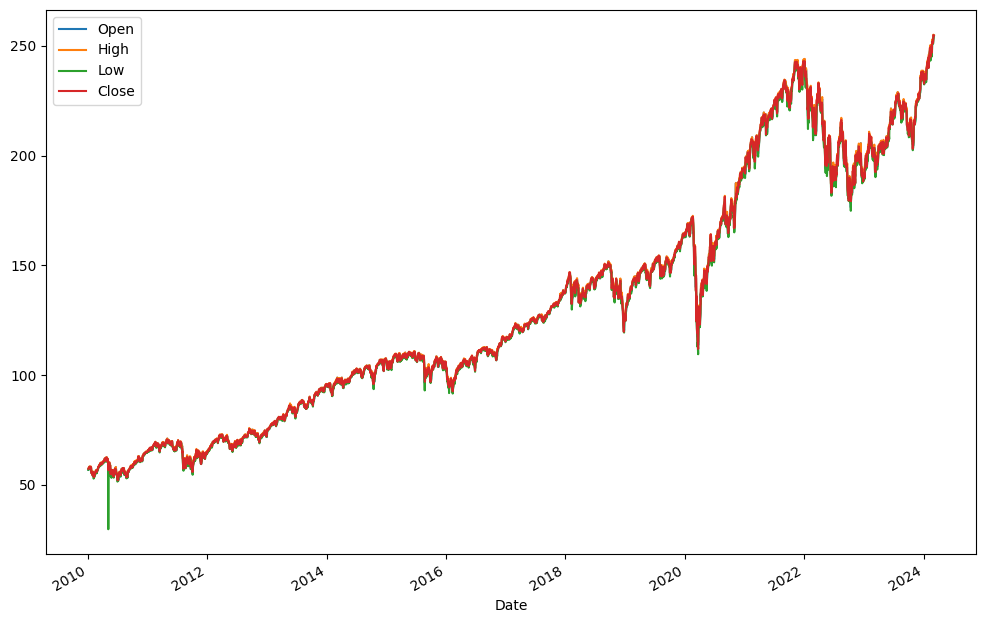

In [3]:
import matplotlib.pyplot as plt

# 確保你的數據已經被排序，特別是如果它是時間序列數據
data = data.sort_index()

# 繪製'Open'、'High'、'Low'和'Close'的線圖
data[['Open', 'High', 'Low', 'Close']].plot(figsize=(12, 8))
plt.title('VTI Stock Prices')
# 顯示圖表
plt.show()

<img src="./24.png" height="500"/>

/Users/jerry/Documents/stock_project/.venv/lib/python3.8/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


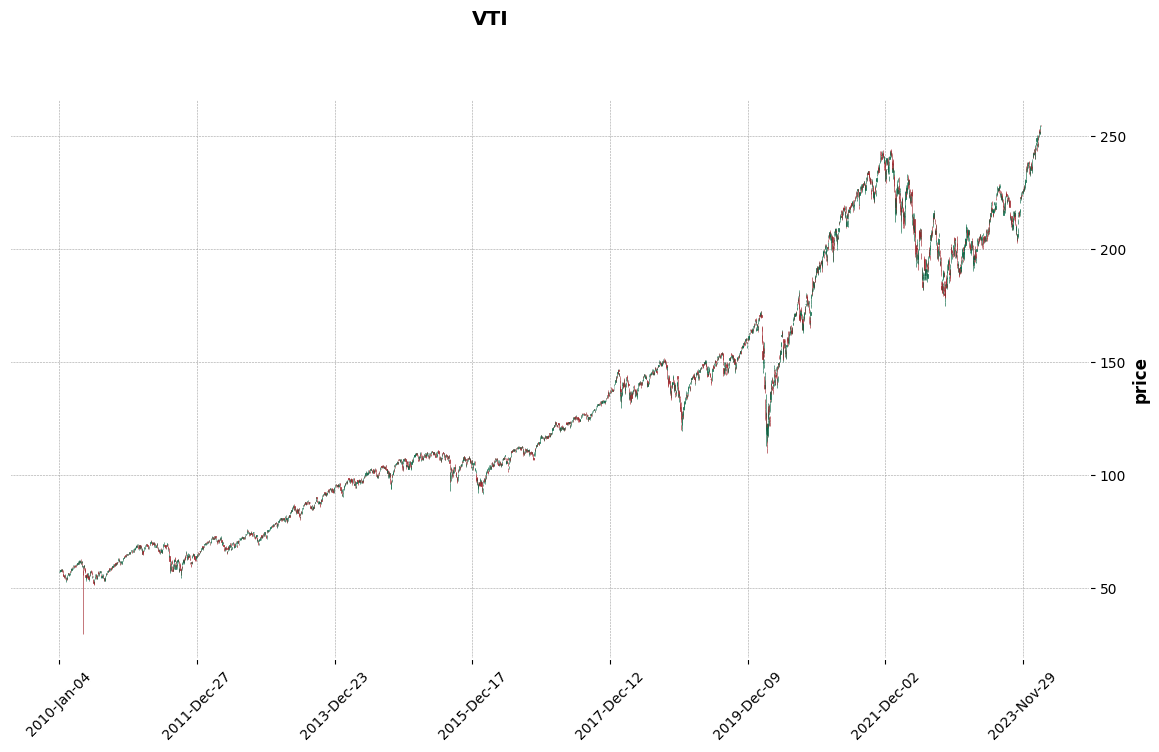

In [9]:
import mplfinance as mpf

# 確保你的數據已經被排序，特別是如果它是時間序列數據
data = data.sort_index()

# 繪製K線圖
mpf.plot(data, type='candle', style='charles', title='VTI', ylabel='price',figsize=(15, 8))


<img src="./25.png" height="500"/>

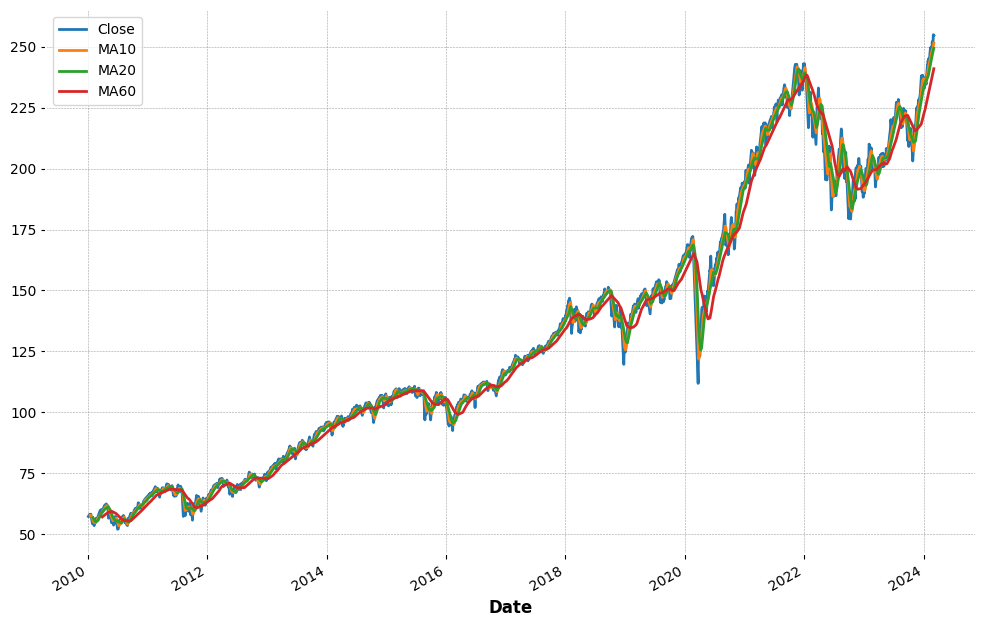

In [10]:
# 計算10日、20日和60日的移動平均線
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA60'] = data['Close'].rolling(window=60).mean()

# 繪製'Close'、'MA10'、'MA20'和'MA60'的線圖
data[['Close', 'MA10', 'MA20', 'MA60']].plot(figsize=(12, 8))

# 顯示圖表
plt.show()

<img src="./2.png" height="500"/>

In [11]:
import yfinance as yf
import pandas as pd

# 定義股票代碼和日期範圍
ticker = 'VTI'
start_date = '2010-01-01'

# 使用 yfinance 下載股價資料
data = yf.download(ticker, start=start_date)

# 計算2010年第一個交易日可以購買的股數
first_day_price = data['Adj Close'][0]
shares = 10000 / first_day_price

# 計算每年的價值和報酬率
data['Year'] = data.index.year
yearly_values = data.groupby('Year')['Adj Close'].last() * shares
returns = yearly_values.pct_change()

# 印出每年的價值和報酬率
print(yearly_values)
print(returns)

[*********************100%%**********************]  1 of 1 completed

Year
2010    11550.223296
2011    11662.090087
2012    13580.662242
2013    18123.361328
2014    20397.721054
2015    20470.144420
2016    23093.953855
2017    27992.979996
2018    26527.601965
2019    34663.251827
2020    41968.932603
2021    52747.331490
2022    42449.233434
2023    53505.975108
2024    57437.383714
Name: Adj Close, dtype: float64
Year
2010         NaN
2011    0.009685
2012    0.164514
2013    0.334498
2014    0.125493
2015    0.003551
2016    0.128177
2017    0.212135
2018   -0.052348
2019    0.306686
2020    0.210762
2021    0.256819
2022   -0.195234
2023    0.260470
2024    0.073476
Name: Adj Close, dtype: float64


<img src="./3.png" height="500"/>

In [12]:
import yfinance as yf
import pandas as pd

# 定義股票代碼和日期範圍
ticker = 'VTI'
start_date = '2010-01-01'

# 使用 yfinance 下載股價資料
data = yf.download(ticker, start=start_date)

# 計算2010年第一個交易日可以購買的股數
first_day_price = data['Adj Close'][0]
shares = 10000 / first_day_price

# 計算每年的價值和報酬率
data['Year'] = data.index.year
yearly_values = data.groupby('Year')['Adj Close'].last() * shares
returns = yearly_values.pct_change()

# 將每年的價值和報酬率存入一個 DataFrame
result = pd.DataFrame({
    'Yearly Value': yearly_values,
    'Return Rate': returns
})

# 印出結果
print(result)

[*********************100%%**********************]  1 of 1 completed

      Yearly Value  Return Rate
Year                           
2010  11550.220715          NaN
2011  11662.093528     0.009686
2012  13580.663963     0.164513
2013  18123.357886     0.334497
2014  20397.721054     0.125493
2015  20470.144420     0.003551
2016  23093.955576     0.128177
2017  27992.979996     0.212134
2018  26527.605407    -0.052348
2019  34663.255269     0.306686
2020  41968.929161     0.210761
2021  52747.331490     0.256819
2022  42449.233434    -0.195234
2023  53505.975108     0.260470
2024  57167.758713     0.068437


<img src="./4.png" height="400"/>

<img src="./5.png" height="500"/>

In [13]:
import yfinance as yf
import pandas as pd

# 定義股票代碼和日期範圍
ticker = 'VTI'
start_date = '2010-01-01'

# 使用 yfinance 下載股價資料
data = yf.download(ticker, start=start_date)

# 計算2010年第一個交易日可以購買的股數
first_day_price = data['Adj Close'][0]
shares = 10000 / first_day_price

# 計算每年的價值
data['Year'] = data.index.year
yearly_values = data.groupby('Year')['Adj Close'].last() * shares

# 計算報酬率
returns = yearly_values.pct_change()
returns[2010] = (yearly_values[2010] - 10000) / 10000

# 將每年的價值和報酬率存入一個 DataFrame
result = pd.DataFrame({
    'Yearly Value': yearly_values,
    'Return Rate': returns
})

# 印出結果
print(result)

[*********************100%%**********************]  1 of 1 completed

      Yearly Value  Return Rate
Year                           
2010  11550.219588     0.155022
2011  11662.089801     0.009686
2012  13580.658184     0.164513
2013  18123.349605     0.334497
2014  20397.717544     0.125494
2015  20470.139177     0.003550
2016  23093.948160     0.128177
2017  27992.975179     0.212135
2018  26527.595679    -0.052348
2019  34663.245862     0.306686
2020  41968.918497     0.210761
2021  52747.325855     0.256819
2022  42449.226129    -0.195235
2023  53505.965901     0.260470
2024  57207.311031     0.069176


<img src="./6.png" height="500"/>

In [14]:
import yfinance as yf
import pandas as pd

# 定義股票代碼和日期範圍
ticker = 'VTI'
start_date = '2010-01-01'

# 使用 yfinance 下載股價資料
data = yf.download(ticker, start=start_date)

# 計算2010年第一個交易日可以購買的股數
first_day_price = data['Adj Close'][0]
shares = 10000 / first_day_price

# 計算每年的價值
data['Year'] = data.index.year
yearly_values = data.groupby('Year')['Adj Close'].last() * shares

# 計算報酬率並轉換為百分比
returns = yearly_values.pct_change()
returns[2010] = (yearly_values[2010] - 10000) / 10000
returns = returns * 100

# 將每年的價值和報酬率存入一個 DataFrame
result = pd.DataFrame({
    'Yearly Value': yearly_values,
    'Return Rate (%)': returns
})

# 印出結果
print(result)

[*********************100%%**********************]  1 of 1 completed

      Yearly Value  Return Rate (%)
Year                               
2010  11550.217734        15.502177
2011  11662.087937         0.968555
2012  13580.654434        16.451312
2013  18123.351487        33.449765
2014  20397.717510        12.549368
2015  20470.133974         0.355022
2016  23093.951336        12.817783
2017  27992.976212        21.213455
2018  26527.591676        -5.234829
2019  34663.242880        30.668639
2020  41968.918328        21.076145
2021  52747.321316        25.681870
2022  42449.222476       -19.523454
2023  53505.961297        26.046976
2024  57211.814715         6.926057


<img src="./7.png" height="500"/>

In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import yfinance as yf
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.2f' % x)

def calculate_returns(ticker, start_date, initial_investment=10000):
    # 使用 yfinance 下載股價資料
    data = yf.download(ticker, start=start_date)

    # 計算開始日期的交易日可以購買的股數
    first_day_price = data['Adj Close'][0]
    shares = initial_investment / first_day_price

    # 計算每年的價值
    data['Year'] = data.index.year
    yearly_values = data.groupby('Year')['Adj Close'].last() * shares

    # 計算報酬率並轉換為百分比
    returns = yearly_values.pct_change()
    returns[data.index.year[0]] = (yearly_values[data.index.year[0]] - initial_investment) / initial_investment
    returns = returns * 100

    tol_return = (yearly_values.tail(1).values[0] - initial_investment) / initial_investment * 100
    
    # 將每年的價值和報酬率存入一個 DataFrame
    result = pd.DataFrame({
        'Yearly Value': yearly_values,
        'Return Rate (%)': returns,
        'Total Return (%)': tol_return        
    })

    return result


# 使用函數
VTI = calculate_returns('VTI', '2010-01-01')
print(VTI)

[*********************100%%**********************]  1 of 1 completed

      Yearly Value  Return Rate (%)  Total Return (%)
Year                                                 
2010      11550.23            15.50            471.64
2011      11662.10             0.97            471.64
2012      13580.67            16.45            471.64
2013      18123.35            33.45            471.64
2014      20397.73            12.55            471.64
2015      20470.15             0.36            471.64
2016      23093.96            12.82            471.64
2017      27992.98            21.21            471.64
2018      26527.60            -5.23            471.64
2019      34663.26            30.67            471.64
2020      41968.94            21.08            471.64
2021      52747.34            25.68            471.64
2022      42449.24           -19.52            471.64
2023      53505.98            26.05            471.64
2024      57164.47             6.84            471.64


<img src="./26.png" height="150"/>

In [21]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

def calculate_returns(ticker, start_date, initial_investment=10000):
    # 使用 yfinance 下載股價資料
    data = yf.download(ticker, start=start_date)

    # 計算開始日期的交易日可以購買的股數
    first_day_price = data['Adj Close'][0]
    shares = initial_investment / first_day_price

    # 計算每年的價值
    data['Year'] = data.index.year
    yearly_values = data.groupby('Year')['Adj Close'].last() * shares

    # 計算報酬率並轉換為百分比
    returns = yearly_values.pct_change()
    returns[data.index.year[0]] = (yearly_values[data.index.year[0]] - initial_investment) / initial_investment
    returns = returns * 100

    # 計算CAGR
    num_years = len(yearly_values)
    cagr = (yearly_values.iloc[-1] / yearly_values.iloc[0]) ** (1 / num_years) - 1
    cagr = cagr * 100

    tol_return = (yearly_values.tail(1).values[0] - initial_investment) / initial_investment * 100
    
    # 將每年的價值、報酬率和CAGR存入一個 DataFrame
    result = pd.DataFrame({
        'Yearly Value': yearly_values,
        'Return Rate (%)': returns,
        'Total Return (%)': tol_return,
        'CAGR (%)': cagr
    })

    return result

# 使用函數
VTI = calculate_returns('VTI', '2010-01-01')
print(VTI)

[*********************100%%**********************]  1 of 1 completed

      Yearly Value  Return Rate (%)  Total Return (%)  CAGR (%)
Year                                                           
2010      11550.22            15.50            471.13     11.24
2011      11662.09             0.97            471.13     11.24
2012      13580.66            16.45            471.13     11.24
2013      18123.35            33.45            471.13     11.24
2014      20397.71            12.55            471.13     11.24
2015      20470.14             0.36            471.13     11.24
2016      23093.95            12.82            471.13     11.24
2017      27992.98            21.21            471.13     11.24
2018      26527.60            -5.23            471.13     11.24
2019      34663.24            30.67            471.13     11.24
2020      41968.91            21.08            471.13     11.24
2021      52747.32            25.68            471.13     11.24
2022      42449.22           -19.52            471.13     11.24
2023      53505.96            26.05     

<img src="./8.png" height="500"/>

[*********************100%%**********************]  1 of 1 completed


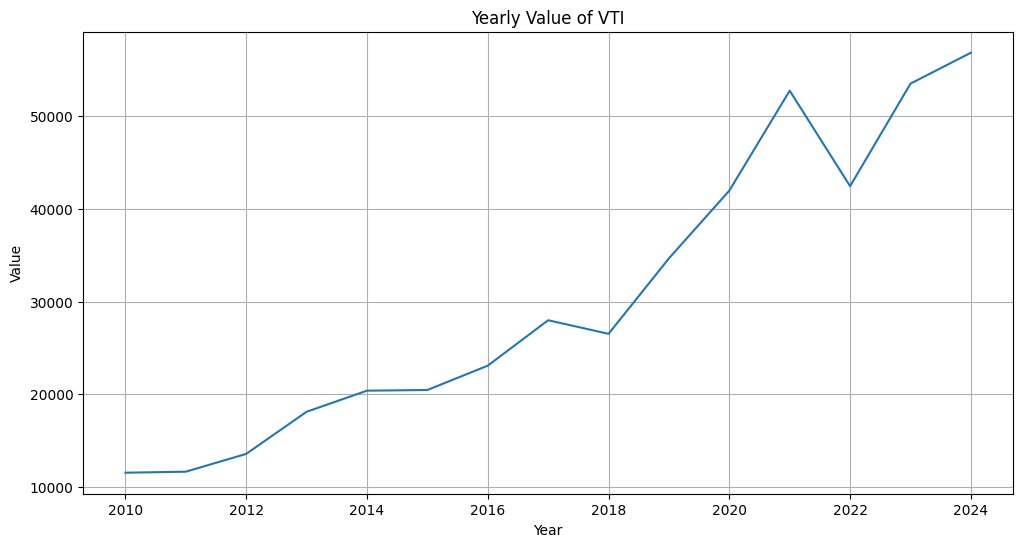

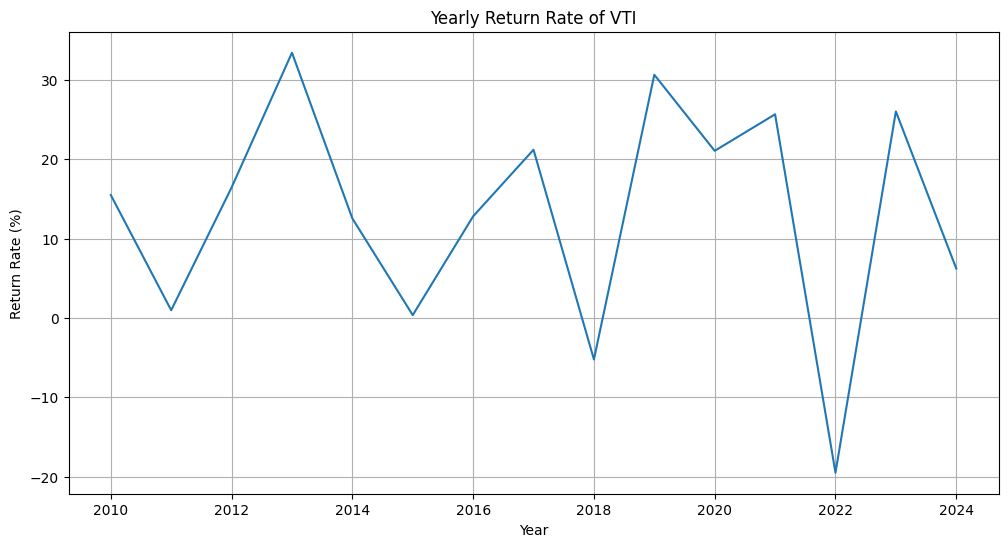

In [7]:
import matplotlib.pyplot as plt

# 使用函數計算價值和報酬率
result = calculate_returns('VTI', '2010-01-01')

# 繪製價值的圖表
plt.figure(figsize=(12, 6))
plt.plot(result['Yearly Value'])
plt.title('Yearly Value of VTI')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# 繪製報酬率的圖表
plt.figure(figsize=(12, 6))
plt.plot(result['Return Rate (%)'])
plt.title('Yearly Return Rate of VTI')
plt.xlabel('Year')
plt.ylabel('Return Rate (%)')
plt.grid(True)
plt.show()

<img src="./9.png" height="500"/>

In [24]:
import matplotlib.pyplot as plt

def plot_data(result, ticker):
    # 繪製價值的圖表
    plt.figure(figsize=(12, 6))
    plt.plot(result['Yearly Value'])
    plt.title(f'Yearly Value of {ticker}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.grid(True)
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()


In [34]:
AAPL = calculate_returns('AAPL', '2010-01-01')
TSLA =   calculate_returns('TSLA', '2010-01-01')
NVDA =  calculate_returns('NVDA', '2010-01-01')
TSM =  calculate_returns('TSM', '2010-01-01')
MU =  calculate_returns('MU', '2010-01-01')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


      Yearly Value  Return Rate (%)  Total Return (%)  CAGR (%)
Year                                                           
2010      15072.20            50.72           2531.54     21.00
2011      18924.35            25.56           2531.54     21.00
2012      25087.43            32.57           2531.54     21.00
2013      27111.88             8.07           2531.54     21.00
2014      38125.39            40.62           2531.54     21.00
2015      36976.40            -3.01           2531.54     21.00
2016      41591.21            12.48           2531.54     21.00
2017      61748.12            48.46           2531.54     21.00
2018      58419.77            -5.39           2531.54     21.00
2019     110388.75            88.96           2531.54     21.00
2020     201246.06            82.31           2531.54     21.00
2021     270974.18            34.65           2531.54     21.00
2022     199425.64           -26.40           2531.54     21.00
2023     297160.25            49.01     

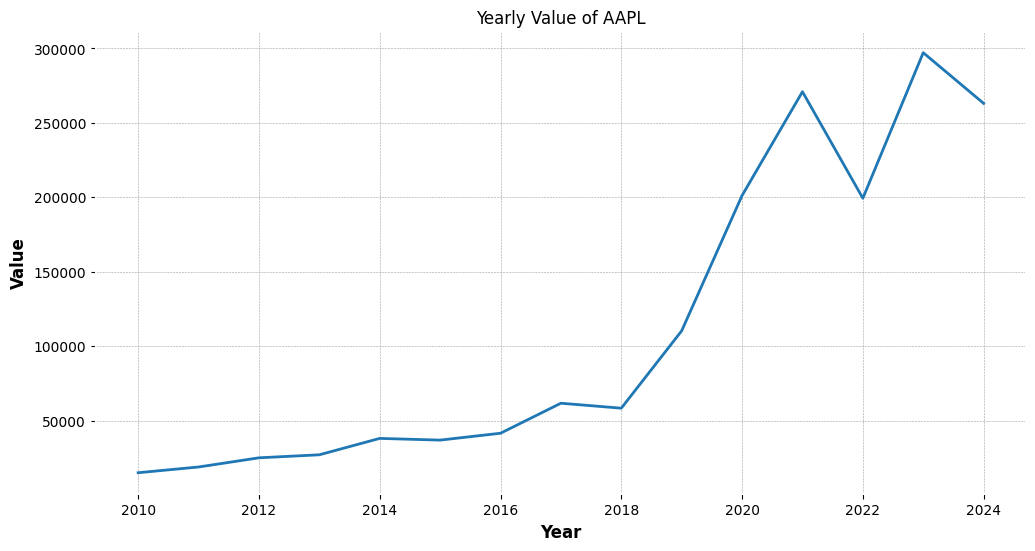

In [36]:
print(AAPL)
plot_data(AAPL, 'AAPL')

      Yearly Value  Return Rate (%)  Total Return (%)  CAGR (%)
Year                                                           
2010      11146.92            11.47          11290.08     36.13
2011      11954.79             7.25          11290.08     36.13
2012      14177.48            18.59          11290.08     36.13
2013      62967.76           344.14          11290.08     36.13
2014      93097.51            47.85          11290.08     36.13
2015     100464.62             7.91          11290.08     36.13
2016      89447.45           -10.97          11290.08     36.13
2017     130326.47            45.70          11290.08     36.13
2018     139305.12             6.89          11290.08     36.13
2019     175106.70            25.70          11290.08     36.13
2020    1476914.70           743.44          11290.08     36.13
2021    2211761.86            49.76          11290.08     36.13
2022     773419.69           -65.03          11290.08     36.13
2023    1560150.35           101.72     

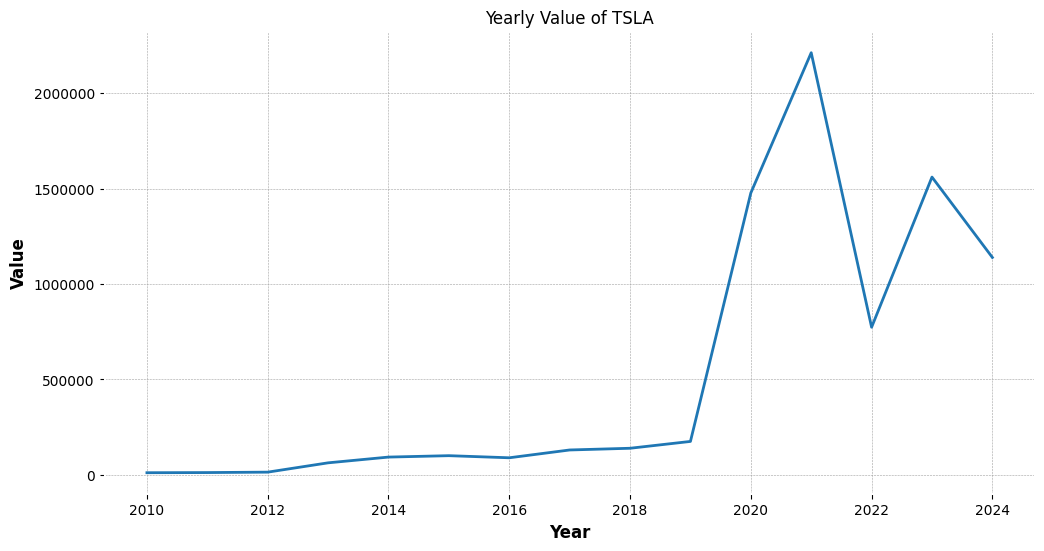

In [37]:
print(TSLA)
plot_data(TSLA, 'TSLA')

      Yearly Value  Return Rate (%)  Total Return (%)  CAGR (%)
Year                                                           
2010       8328.83           -16.71          19949.86     44.13
2011       7495.95           -10.00          19949.86     44.13
2012       6673.39           -10.97          19949.86     44.13
2013       8910.56            33.52          19949.86     44.13
2014      11351.68            27.40          19949.86     44.13
2015      18970.42            67.12          19949.86     44.13
2016      62025.75           226.96          19949.86     44.13
2017     112879.40            81.99          19949.86     44.13
2018      78095.34           -30.82          19949.86     44.13
2019     138184.25            76.94          19949.86     44.13
2020     307177.54           122.30          19949.86     44.13
2021     692630.31           125.48          19949.86     44.13
2022     344482.16           -50.26          19949.86     44.13
2023    1167853.82           239.02     

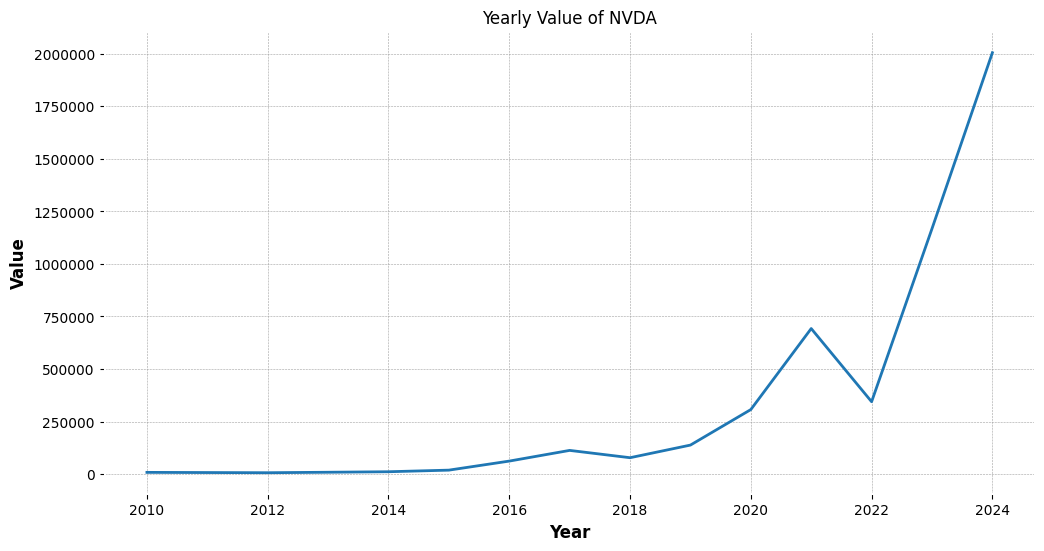

In [38]:
print(NVDA)
plot_data(NVDA, 'NVDA')

      Yearly Value  Return Rate (%)  Total Return (%)  CAGR (%)
Year                                                           
2010      11368.11            13.68           1728.09     20.34
2011      12197.32             7.29           1728.09     20.34
2012      16796.64            37.71           1728.09     20.34
2013      17546.84             4.47           1728.09     20.34
2014      23023.81            31.21           1728.09     20.34
2015      24148.43             4.88           1728.09     20.34
2016      31662.68            31.12           1728.09     20.34
2017      45089.76            42.41           1728.09     20.34
2018      43508.98            -3.51           1728.09     20.34
2019      71721.03            64.84           1728.09     20.34
2020     138183.72            92.67           1728.09     20.34
2021     154896.57            12.09           1728.09     20.34
2022      97974.49           -36.75           1728.09     20.34
2023     139446.81            42.33     

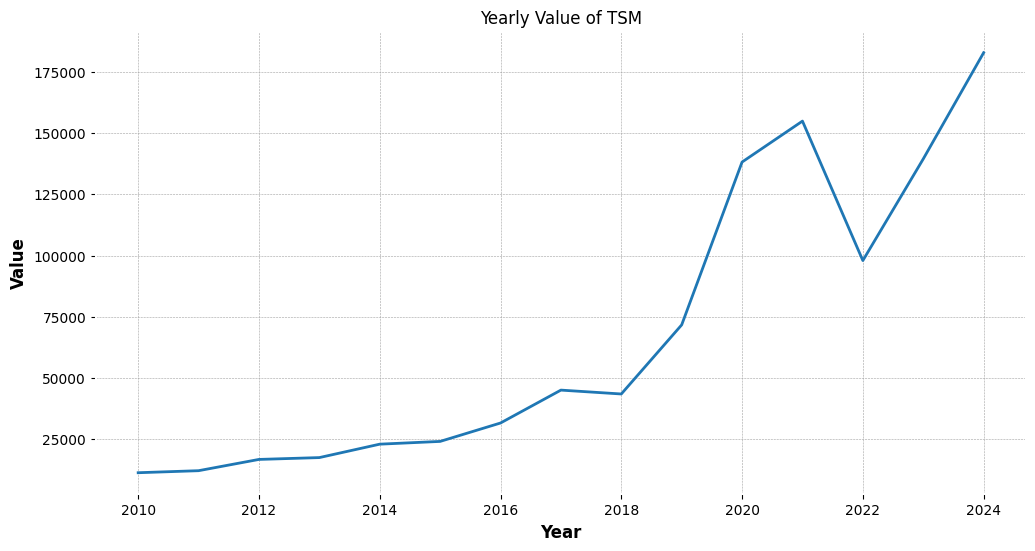

In [39]:
print(TSM)
plot_data(TSM, 'TSM')


      Yearly Value  Return Rate (%)  Total Return (%)  CAGR (%)
Year                                                           
2010       7391.70           -26.08            787.74     18.02
2011       5797.23           -21.57            787.74     18.02
2012       5843.32             0.79            787.74     18.02
2013      20046.08           243.06            787.74     18.02
2014      32267.28            60.97            787.74     18.02
2015      13050.69           -59.55            787.74     18.02
2016      20202.76            54.80            787.74     18.02
2017      37898.61            87.59            787.74     18.02
2018      29244.24           -22.84            787.74     18.02
2019      49566.82            69.49            787.74     18.02
2020      69290.31            39.79            787.74     18.02
2021      86064.20            24.21            787.74     18.02
2022      46535.14           -45.93            787.74     18.02
2023      80008.42            71.93     

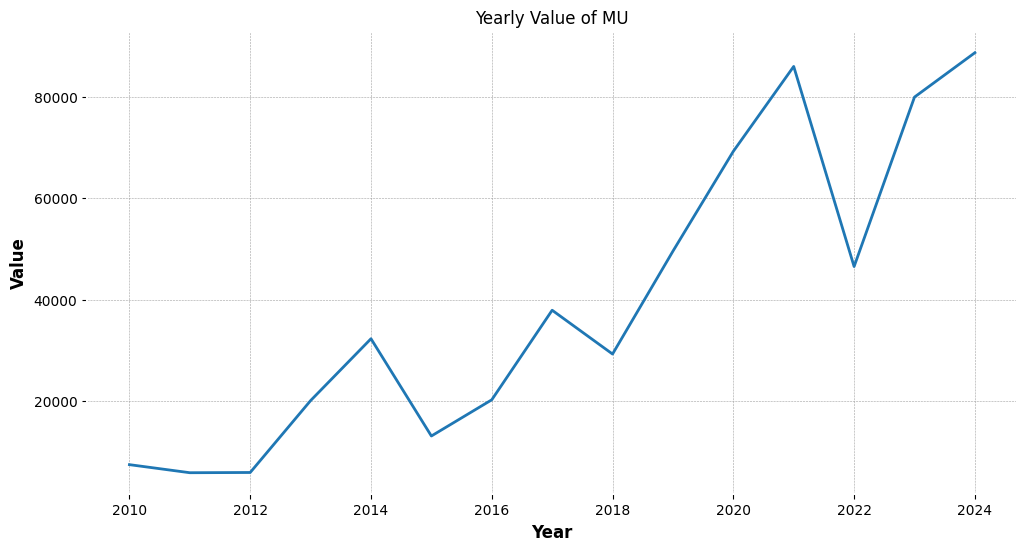

In [40]:
print(MU)
plot_data(MU, 'MU')

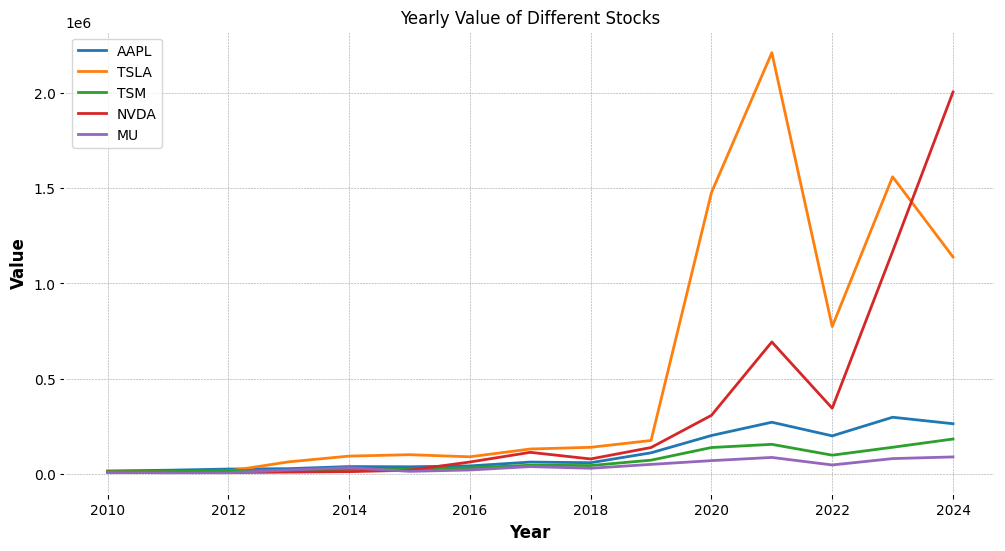

In [41]:
import matplotlib.pyplot as plt

# 繪製所有股票的年度價值
plt.figure(figsize=(12, 6))
plt.plot(AAPL['Yearly Value'], label='AAPL')
plt.plot(TSLA['Yearly Value'], label='TSLA')
plt.plot(TSM['Yearly Value'], label='TSM')
plt.plot(NVDA['Yearly Value'], label='NVDA')
plt.plot(MU['Yearly Value'], label='MU')
plt.title('Yearly Value of Different Stocks')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


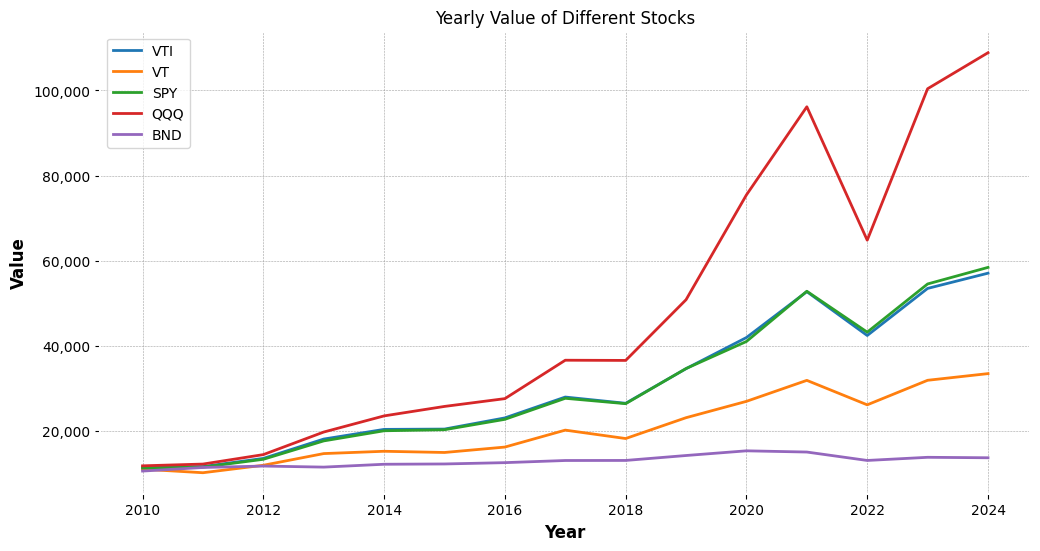

In [42]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 使用函數計算價值和報酬率
VTI = calculate_returns('VTI', '2010-01-01')
VT =   calculate_returns('VT', '2010-01-01')
SPY =  calculate_returns('SPY', '2010-01-01')
QQQ =  calculate_returns('QQQ', '2010-01-01')
BND =  calculate_returns('BND', '2010-01-01')

# 繪製所有股票的年度價值
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(VTI['Yearly Value'], label='VTI')
ax.plot(VT['Yearly Value'], label='VT')
ax.plot(SPY['Yearly Value'], label='SPY')
ax.plot(QQQ['Yearly Value'], label='QQQ')
ax.plot(BND['Yearly Value'], label='BND')
ax.set_title('Yearly Value of Different Stocks')
ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis to display as plain numbers
ax.legend()
ax.grid(True)
plt.show()